In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as sci

# 趋势

## 分组折线图

<AxesSubplot:>

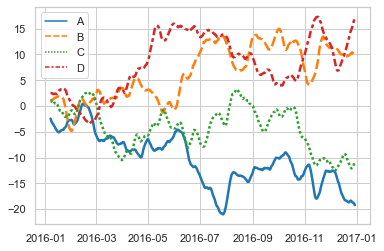

In [17]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

# 分布

有关图形的对比，使用方法和结论；

## 直方图

### 分组堆积直方图

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

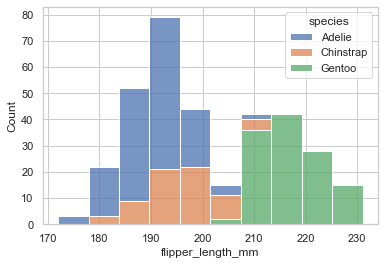

In [19]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## 条形图

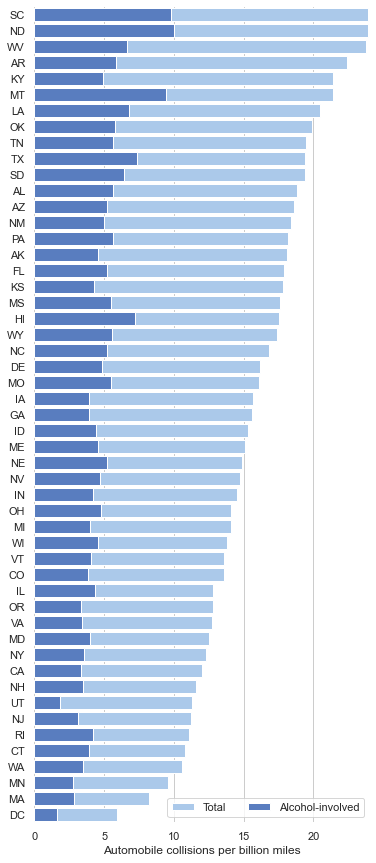

In [13]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

## 堆积图

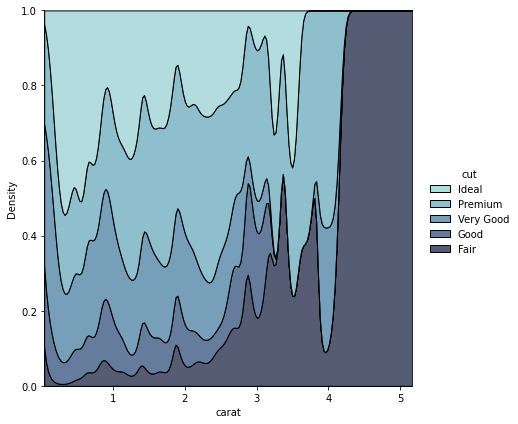

In [2]:
# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75")

## 箱线图

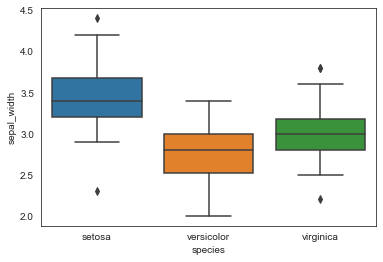

In [42]:
iris = sns.load_dataset('iris')

sns.boxplot(x=iris['species'] , y=iris['sepal_width'])

### 水平箱线图+观测值

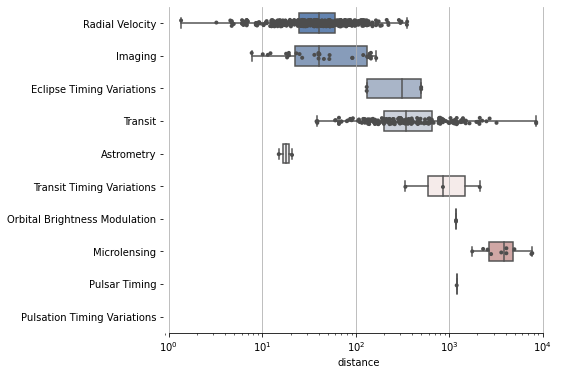

In [7]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 箱线图2

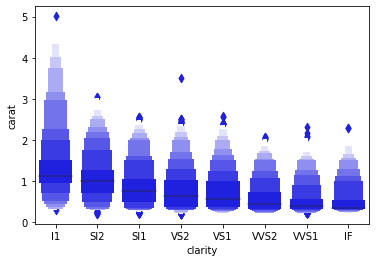

In [16]:
diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

## 散点图

### strip散点图

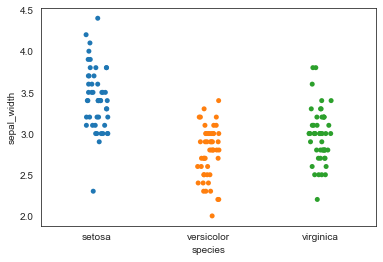

In [41]:
iris = sns.load_dataset('iris')

sns.stripplot(x=iris['species'] , y=iris['sepal_width'])

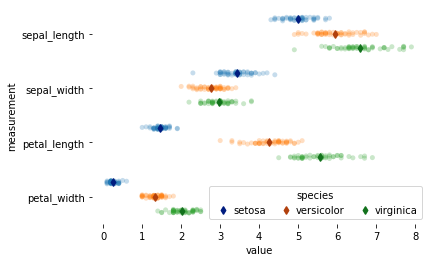

In [10]:
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

## 小提琴图

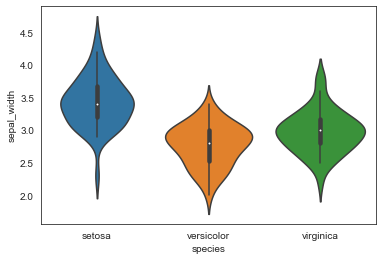

In [43]:
iris = sns.load_dataset('iris')

sns.violinplot(x=iris['species'] , y=iris['sepal_width'])

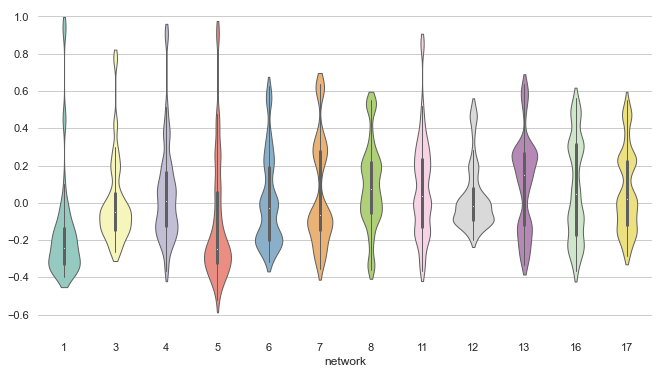

In [18]:
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## 堆积柱状图

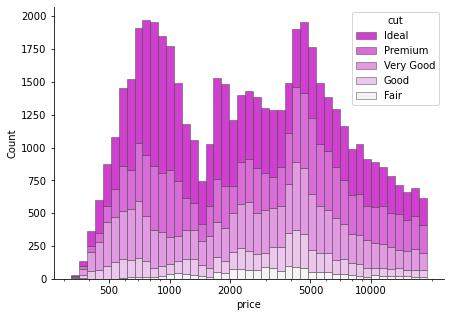

In [5]:
diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

## 综合散点图 - jointplot()
### 散点图+分布图

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


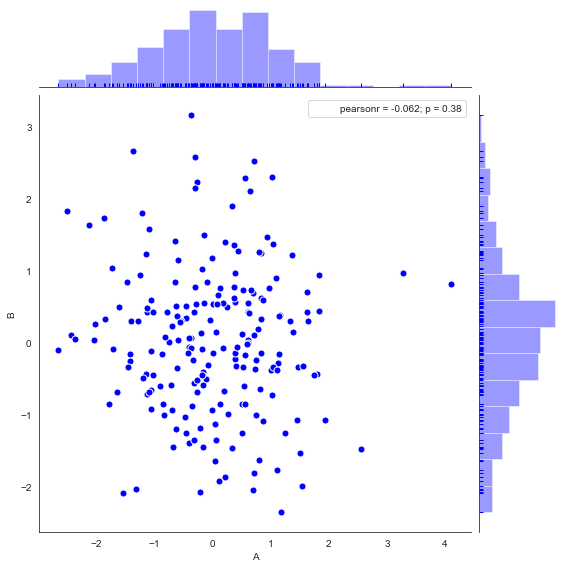

In [23]:
# 创建数据
rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(200,2), columns = ['A','B'])
 
sns.jointplot(x=df['A'], 
              y=df['B'],                                   # 设置xy轴，显示columns名称
              data = df,                                   # 设置数据
              color = 'b',                                 # 设置颜色
              s = 50, edgecolor = 'w', linewidth = 1,      # 设置散点大小、边缘颜色及宽度(只针对scatter)
              stat_func=sci.pearsonr,                      # stat_func=<function pearsonr>,
              kind = 'scatter',                            # 设置类型：'scatter','reg','resid','kde','hex'
              space = 0.1,                                 # 设置散点图和布局图的间距
              height = 8,                                  # 图表大小(自动调整为正方形))
              ratio = 5,                                   # 散点图与布局图高度比，整型
              marginal_kws = dict(bins=15, rug =True)     # 设置柱状图箱数，是否设置rug
             );

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if str(func.__module__).startswith("seaborn"):


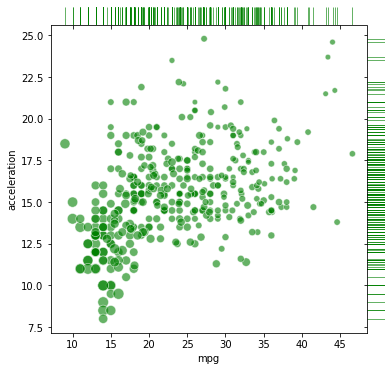

In [19]:
mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

### 联合边界图

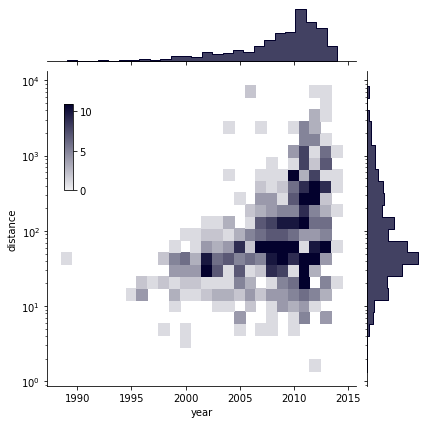

In [6]:
# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance")

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

### 六边形+分布图

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


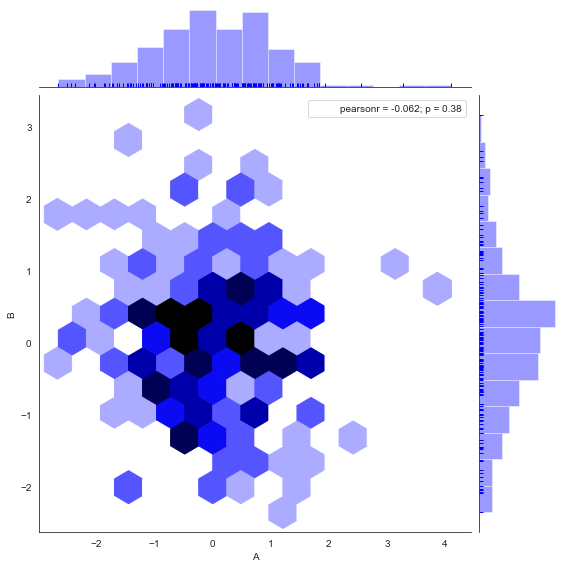

In [24]:
sns.jointplot(x=df['A'], y=df['B'],        # 设置xy轴，显示columns名称
              data = df,                   # 设置数据
              color = 'b',                 # 设置颜色
              stat_func=sci.pearsonr,
              kind = 'hex',                # 设置类型：'scatter','reg','resid','kde','hex'
              space = 0.1,                 # 设置散点图和布局图的间距
              height = 8,                  # 图表大小(自动调整为正方形))
              ratio = 5,                   # 散点图与布局图高度比，整型
              marginal_kws = dict(bins=15, rug =True)       # 设置柱状图箱数，是否设置rug
             )

### 六边形+分布图+style

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


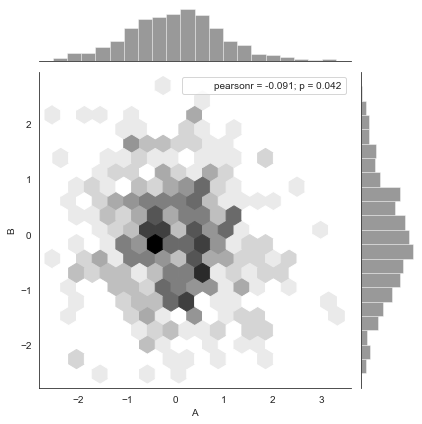

In [25]:
# 创建数据
df = pd.DataFrame(rs.randn(500,2), columns = ['A', 'B'])

with sns.axes_style('white'):
    sns.jointplot(x=df['A'], y=df['B'], data = df, 
                  kind = 'hex',
                  color = 'k',
                  stat_func=sci.pearsonr,
                  marginal_kws = dict(bins = 20))

### 散点图+密度图

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


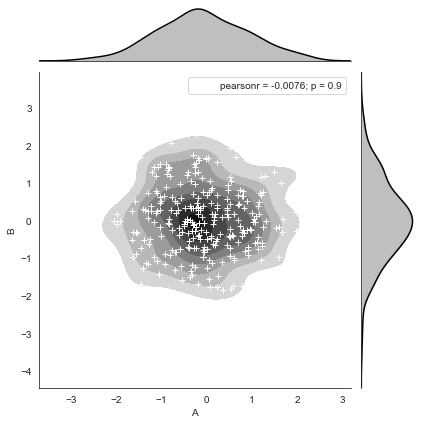

In [28]:
# 创建数据
rs = np.random.RandomState(15)
df = pd.DataFrame(rs.randn(300,2), columns = ['A', 'B'])

# 创建密度图
g = sns.jointplot(x = df['A'], y = df['B'], data = df,
                  kind = 'kde', color = 'k', stat_func= sci.pearsonr,
                  shade_lowest = False)
# 添加散点图
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker='+')

### 散点图+直方图+密度图

<AxesSubplot:>

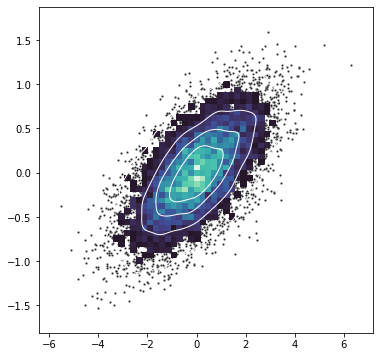

In [7]:
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

### 散点图+直方图+密度图+回归

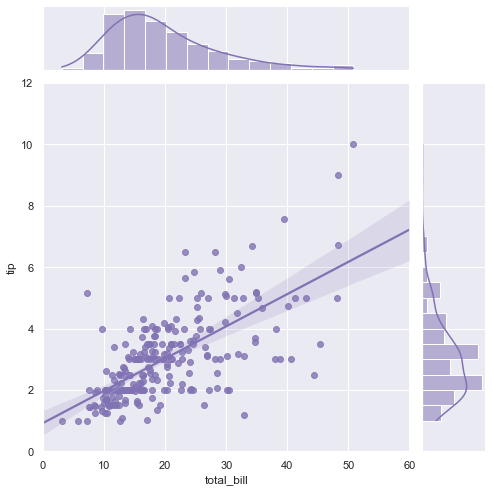

In [14]:
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

### 密度图+直方图

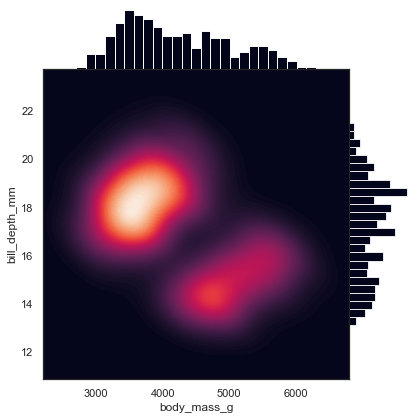

In [15]:
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

## 拆分绘制散点图 - JointGrid() 
### 拆分1=散点+直方图

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


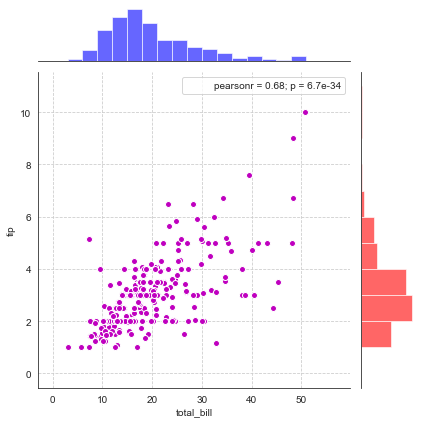

In [29]:
# 设置风格
sns.set_style('white')
# 导入数据
tips = sns.load_dataset('tips')
 
# 创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
 
g.plot_joint(plt.scatter, color = 'm', edgecolor = 'white')    # 设置框内图表，scatter
g.ax_marg_x.hist(tips['total_bill'], color='b', alpha = .6,
                 bins = np.arange(0,60,3))                     # 设置x轴为直方图，注意bins是数组
g.ax_marg_y.hist(tips['tip'], color = 'r', alpha = .6,
                 orientation = 'horizontal',
                 bins = np.arange(0,12,1))                     # 设置y轴直方图，注意需要orientation参数

from scipy import stats
g.annotate(stats.pearsonr)                                     # 设置标注，可以为pearsonar， spearmanr
plt.grid(linestyle = '--')

### 拆分2=散点图+直方图
两个条形图在一个函数里进行设置

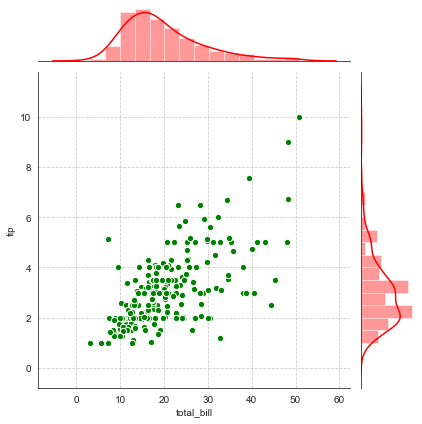

In [30]:
# 创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)

g = g.plot_joint(plt.scatter, color = 'g', s = 40, edgecolor = 'white')    # 绘制散点图
plt.grid(linestyle = '--')
g.plot_marginals(sns.distplot, kde = True, color = 'r')                    # 绘制x，y直方图

### 拆分3=密度图+密度图

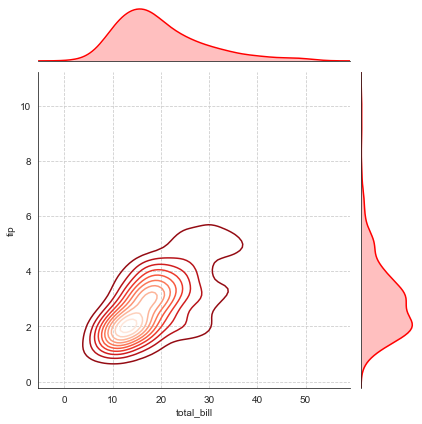

In [19]:
# 创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)

g = g.plot_joint(sns.kdeplot, cmap = 'Reds_r')                # 绘制密度图
plt.grid(linestyle = '--')
g.plot_marginals(sns.kdeplot, shade = True, color = 'r')     # 绘制x,y轴密度图

## 密度图

### 分组密度图

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

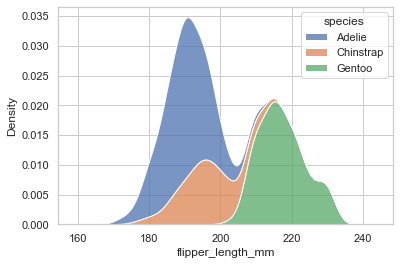

In [20]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

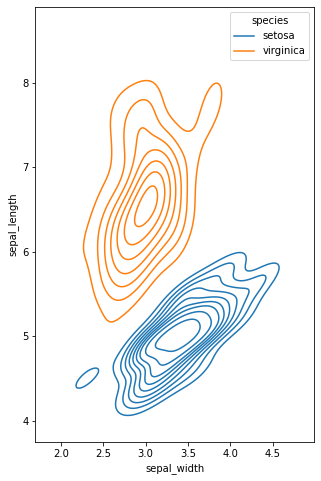

In [8]:
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1)

### 联合密度图

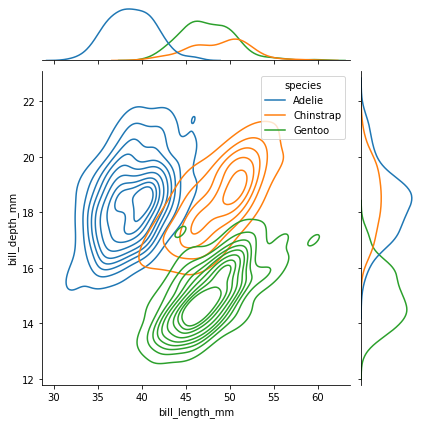

In [9]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde")

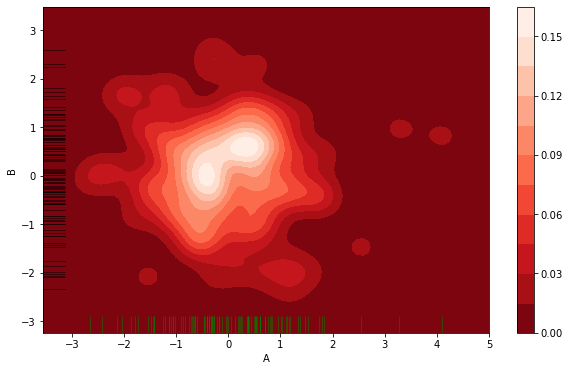

In [3]:
rs = np.random.RandomState(2)              # 设定随机数种子
df = pd.DataFrame(rs.randn(100,2),
                 columns = ['A','B'])

fig = plt.figure(figsize=(10,6))
sns.kdeplot(df['A'],df['B'],
           cbar = True,                  # 是否显示颜色图例
           shade = True,                 # 是否填充
           cmap = 'Reds_r',              # 设置调色盘
           shade_lowest=True,            # 最外围颜色是否显示
           n_levels = 10,                # 曲线个数（越大，越密集）
           bw = .3
           )
# 两个维度数据生成曲线密度图，以颜色作为密度衰减显示

sns.rugplot(df['A'], color="g", axis='x',alpha = 0.5)
sns.rugplot(df['B'], color="k", axis='y',alpha = 0.5)

### 分面密度

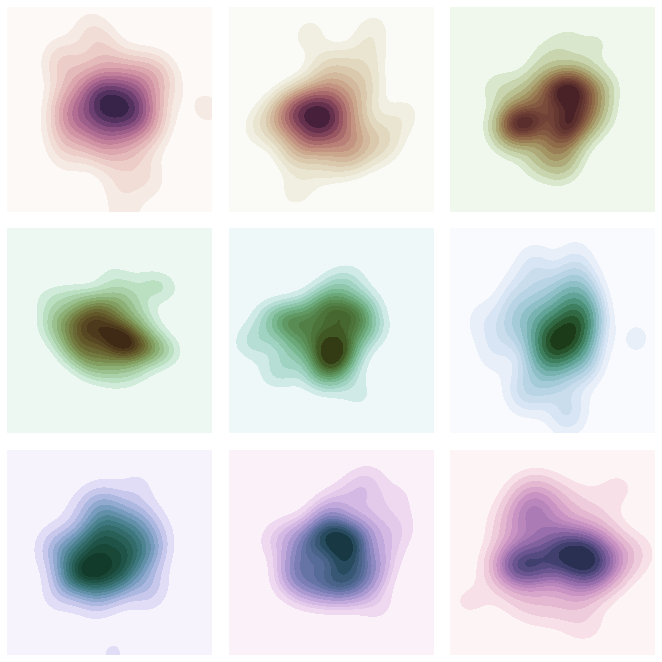

C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\didi\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


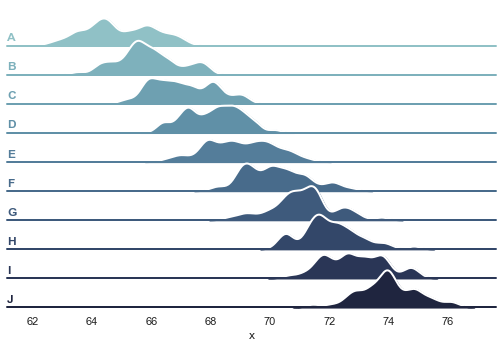

In [11]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# 回归分析

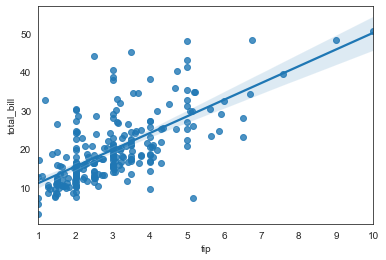

In [40]:
tips = sns.load_dataset('tips')

sns.regplot(x=tips['tip'], y=tips['total_bill'])

### 残差图

<AxesSubplot:>

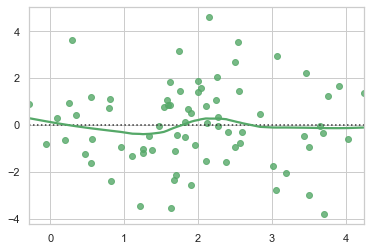

In [16]:
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")